In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
## Funções para avaliar modelos:

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Função para calcular RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def validate_model(y_pred, y_test, model_name=None):
    mse    = mean_squared_error(y_test, y_pred)
    rmse   = root_mean_squared_error(y_test, y_pred)
    mae    = mean_absolute_error(y_test, y_pred)
    mape   = mean_absolute_percentage_error(y_test, y_pred)
    r2     = r2_score(y_test, y_pred)
    
    str_model_results = f"""
    *-------------------------*
    Modelo {model_name}:\n
    MSE  : {mse.round(5)}
    RMSE : {rmse.round(5)}
    MAE  : {mae.round(5)}
    MAPE : {mape.round(5)}
    R²   : {r2.round(5)}
    *-------------------------*\n"""
    print(str_model_results)
    return {'mse': mse.round(5), 'rmse':rmse.round(5), 'mae':mae.round(5), 'mape':mape.round(5), 'r2':r2.round(5)}

# print("*-------------------------*")
# print(f"Modelo {model_name}:\n")
# print(f"MSE  : {mse.round(5)}")
# print(f"RMSE : {rmse.round(5)}")
# print(f"MAE  : {mae.round(5)}")
# print(f"MAPE : {mape.round(5)}")
# print(f"R²   : {r2.round(5)}")
# print("*-------------------------*\n")

In [3]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [4]:
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.Series(data.target, name = 'target')


## Analise Exploratória

In [5]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [7]:
X.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31


In [8]:
y.describe().round(2)

count    20640.00
mean         2.07
std          1.15
min          0.15
25%          1.20
50%          1.80
75%          2.65
max          5.00
Name: target, dtype: float64

In [9]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

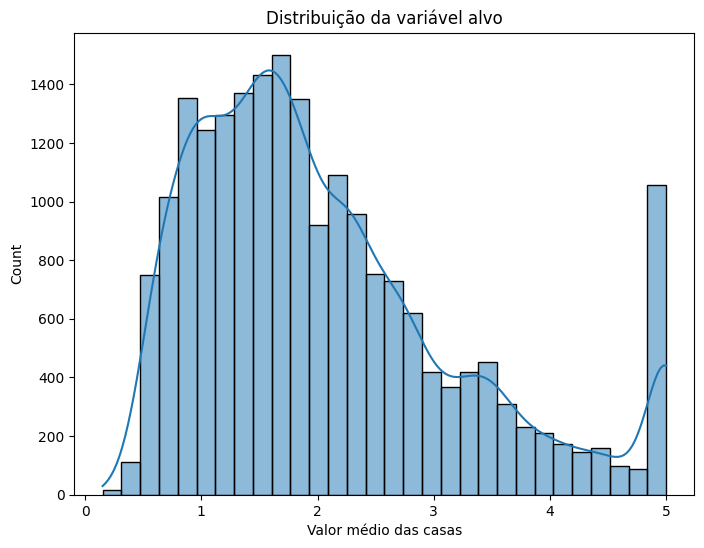

In [10]:
# Distribuição da variável alvo
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribuição da variável alvo')
plt.xlabel('Valor médio das casas')
plt.show()

<Axes: >

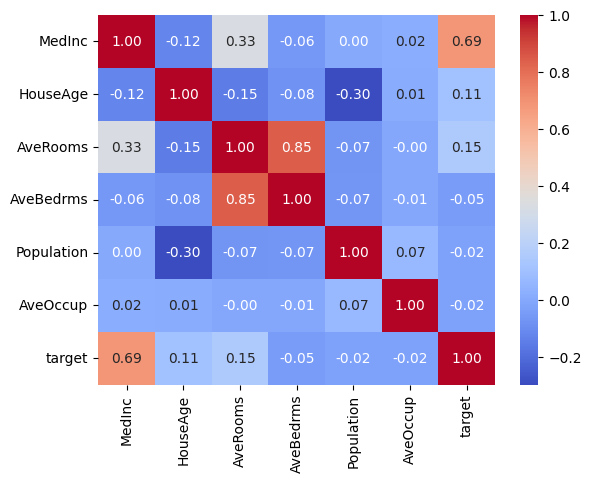

In [11]:
import seaborn as sns
df_corr = X.drop(columns=['Latitude', 'Longitude'])
df_corr['target'] = y
cormat = df_corr.corr()
sns.heatmap(cormat, annot=True, fmt=".2f", cmap="coolwarm")

## Separando treino e teste

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Treinando Modelos

In [13]:
models = {}

### Regressão Linear

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
%%time
model_name = "Regressão Linear 1"
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

models[model_name] = validate_model(y_pred, y_test, model_name=model_name)


    *-------------------------*
    Modelo Regressão Linear 1:

    MSE  : 0.55589
    RMSE : 0.74558
    MAE  : 0.5332
    MAPE : 31.95219
    R²   : 0.57579
    *-------------------------*

CPU times: user 28.2 ms, sys: 50.3 ms, total: 78.5 ms
Wall time: 18.4 ms


In [16]:
%%time
model_name = "Regressão Linear 2"
model = LinearRegression(n_jobs=8, positive=True, fit_intercept=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
models[model_name] = validate_model(y_pred, y_test, model_name=model_name)


    *-------------------------*
    Modelo Regressão Linear 2:

    MSE  : 0.66244
    RMSE : 0.8139
    MAE  : 0.60494
    MAPE : 37.79408
    R²   : 0.49448
    *-------------------------*

CPU times: user 184 ms, sys: 69.1 ms, total: 253 ms
Wall time: 43.1 ms


### Lasso

In [17]:
from sklearn.linear_model import Lasso

In [18]:
%%time
model_name = "Lasso 1"
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
models[model_name] = validate_model(y_pred, y_test, model_name=model_name)


    *-------------------------*
    Modelo Lasso 1:

    MSE  : 0.93803
    RMSE : 0.96852
    MAE  : 0.76158
    MAPE : 52.43863
    R²   : 0.28417
    *-------------------------*

CPU times: user 1.57 s, sys: 503 ms, total: 2.07 s
Wall time: 385 ms


In [19]:
%%time
model_name = "Lasso 2"
model = Lasso(tol=0.000000000000001, random_state=42, selection='random', fit_intercept=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
models[model_name] = validate_model(y_pred, y_test, model_name=model_name)


    *-------------------------*
    Modelo Lasso 2:

    MSE  : 0.91468
    RMSE : 0.95639
    MAE  : 0.7489
    MAPE : 51.34698
    R²   : 0.30199
    *-------------------------*

CPU times: user 4.61 s, sys: 453 ms, total: 5.06 s
Wall time: 822 ms


### Ridge Regression

In [20]:
from sklearn.linear_model import Ridge

In [21]:
%%time
model_name = "Rigde 1"
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
models[model_name] = validate_model(y_pred, y_test, model_name=model_name)


    *-------------------------*
    Modelo Rigde 1:

    MSE  : 0.5558
    RMSE : 0.74552
    MAE  : 0.5332
    MAPE : 31.95235
    R²   : 0.57585
    *-------------------------*

CPU times: user 516 ms, sys: 97 ms, total: 613 ms
Wall time: 95.8 ms


In [22]:
%%time
model_name = "Rigde 2"
model = Ridge(alpha=0.3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
models[model_name] = validate_model(y_pred, y_test, model_name=model_name)


    *-------------------------*
    Modelo Rigde 2:

    MSE  : 0.55587
    RMSE : 0.74556
    MAE  : 0.5332
    MAPE : 31.95224
    R²   : 0.57581
    *-------------------------*

CPU times: user 74.5 ms, sys: 13.2 ms, total: 87.8 ms
Wall time: 13.3 ms


### ElasticNet

In [23]:
from sklearn.linear_model import ElasticNet

In [24]:
%%time
model_name = "ElasticNet 1"
model = ElasticNet(alpha=0.5, l1_ratio=0.5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
models[model_name] = validate_model(y_pred, y_test, model_name=model_name)


    *-------------------------*
    Modelo ElasticNet 1:

    MSE  : 0.68687
    RMSE : 0.82878
    MAE  : 0.63061
    MAPE : 41.44608
    R²   : 0.47583
    *-------------------------*

CPU times: user 425 ms, sys: 322 ms, total: 747 ms
Wall time: 117 ms


In [25]:
%%time
model_name = "ElasticNet 2"
model = ElasticNet(alpha=0.1, l1_ratio=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
models[model_name] = validate_model(y_pred, y_test, model_name=model_name)


    *-------------------------*
    Modelo ElasticNet 2:

    MSE  : 0.55503
    RMSE : 0.745
    MAE  : 0.54599
    MAPE : 32.89
    R²   : 0.57645
    *-------------------------*

CPU times: user 1.16 s, sys: 581 ms, total: 1.74 s
Wall time: 251 ms


### Arvore de Decisão

In [26]:
from sklearn import tree

In [27]:
%%time
model_name = "Árvore de Decisão 1"
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
y_pred = model.predict(X_test)
models[model_name] = validate_model(y_pred, y_test, model_name=model_name)

1.0

    *-------------------------*
    Modelo Árvore de Decisão 1:

    MSE  : 0.49303
    RMSE : 0.70216
    MAE  : 0.45211
    MAPE : 24.954
    R²   : 0.62376
    *-------------------------*

CPU times: user 746 ms, sys: 406 ms, total: 1.15 s
Wall time: 328 ms


In [28]:
%%time
model_name = "Árvore de Decisão 2"
model = tree.DecisionTreeRegressor(criterion='friedman_mse')
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
y_pred = model.predict(X_test)
models[model_name] = validate_model(y_pred, y_test, model_name=model_name)

1.0

    *-------------------------*
    Modelo Árvore de Decisão 2:

    MSE  : 0.50295
    RMSE : 0.70919
    MAE  : 0.45583
    MAPE : 25.26797
    R²   : 0.61619
    *-------------------------*

CPU times: user 208 ms, sys: 1.63 ms, total: 209 ms
Wall time: 209 ms


### SVM (SVC e SVR)

Para nosso problema de SVC, como iremos trabalhar em modelo de classificação, vou transformar nosso **target** em uma estrutura binária baseada na média dos dados a princípio para fins de testes

In [29]:
from sklearn.svm import SVC, SVR

In [35]:
%%time
bin_y = y.apply(lambda x: 1 if x>2.07 else 0)
bin_X_train, bin_X_test, bin_y_train, bin_y_test = train_test_split(X, bin_y, test_size=0.3, random_state=42)

model_name = "SVC"
model_svc = SVC(kernel='rbf', verbose=True)
model_svc.fit(bin_X_train, bin_y_train)
bin_y_pred = model_svc.predict(bin_X_test)
precisao = accuracy_score(bin_y_test, bin_y_pred)
print(f'\nPrecisão do modelo SVC: {precisao.round(4)}')
models[model_name] = validate_model(y_pred, y_test, model_name=model_name)

[LibSVM].......
*.......
*
optimization finished, #iter = 14425
obj = -11650.332803, rho = -0.627506
nSV = 11723, nBSV = 11644
Total nSV = 11723
Precisão do modelo SVC: 0.5910852713178295

    *-------------------------*
    Modelo SVC 1:

    MSE  : 1.33201
    RMSE : 1.15413
    MAE  : 0.85995
    MAPE : 52.27832
    R²   : -0.01649
    *-------------------------*

CPU times: user 7.92 s, sys: 104 ms, total: 8.03 s
Wall time: 8.07 s


In [31]:
%%time
model_name = "SVR"
model_svc = SVR(kernel='rbf', C=1.0, verbose=True)
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)
models[model_name] = validate_model(y_pred, y_test, model_name=model_name)

[LibSVM]........
*.*
optimization finished, #iter = 9014
obj = -12908.973524, rho = -1.632056
nSV = 15149, nBSV = 15132

    *-------------------------*
    Modelo SVR 1:

    MSE  : 1.33201
    RMSE : 1.15413
    MAE  : 0.85995
    MAPE : 52.27832
    R²   : -0.01649
    *-------------------------*

CPU times: user 10.4 s, sys: 115 ms, total: 10.5 s
Wall time: 10.6 s


### KNN

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
%%time
model_name = "KNN 1"
model_svc = KNeighborsRegressor()
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)
models[model_name] = validate_model(y_pred, y_test, model_name=model_name)


    *-------------------------*
    Modelo KNN 1:

    MSE  : 1.11868
    RMSE : 1.05768
    MAE  : 0.8128
    MAPE : 53.44888
    R²   : 0.14631
    *-------------------------*

CPU times: user 28.5 ms, sys: 13 ms, total: 41.5 ms
Wall time: 85.8 ms


In [52]:
"""
Foi alterado o numero de vizinhos para 9 o que fez otimizar o modelo, já o algorítmo utilizado não impactou no índice de acerto do mesmo.
"""

%%time
model_name = "KNN 2"
model_svc = KNeighborsRegressor(n_neighbors=9, algorithm='kd_tree')
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)
models[model_name] = validate_model(y_pred, y_test, model_name=model_name)


    *-------------------------*
    Modelo KNN 2:

    MSE  : 1.10325
    RMSE : 1.05036
    MAE  : 0.81545
    MAPE : 54.00962
    R²   : 0.15809
    *-------------------------*

CPU times: user 28.6 ms, sys: 9.74 ms, total: 38.4 ms
Wall time: 46.8 ms


## Resultados

In [83]:
for key, value in models.items():
    print(key)
    print('   mse: {0:<10f} rmse: {1:<10f} mae: {2:<10f} mape: {3:<10f} r2: {4:<10f}  \n'.format(
        value['mse'],
        value['rmse'],
        value['mae'],
        value['mape'],
        value['r2']
    ))

Regressão Linear 1
   mse: 0.555890   rmse: 0.745580   mae: 0.533200   mape: 31.952190  r2: 0.575790    

Regressão Linear 2
   mse: 0.662440   rmse: 0.813900   mae: 0.604940   mape: 37.794080  r2: 0.494480    

Lasso 1
   mse: 0.938030   rmse: 0.968520   mae: 0.761580   mape: 52.438630  r2: 0.284170    

Lasso 2
   mse: 0.914680   rmse: 0.956390   mae: 0.748900   mape: 51.346980  r2: 0.301990    

Rigde 1
   mse: 0.555800   rmse: 0.745520   mae: 0.533200   mape: 31.952350  r2: 0.575850    

Rigde 2
   mse: 0.555870   rmse: 0.745560   mae: 0.533200   mape: 31.952240  r2: 0.575810    

ElasticNet 1
   mse: 0.686870   rmse: 0.828780   mae: 0.630610   mape: 41.446080  r2: 0.475830    

ElasticNet 2
   mse: 0.555030   rmse: 0.745000   mae: 0.545990   mape: 32.890000  r2: 0.576450    

Árvore de Decisão 1
   mse: 0.493030   rmse: 0.702160   mae: 0.452110   mape: 24.954000  r2: 0.623760    

Árvore de Decisão 2
   mse: 0.502950   rmse: 0.709190   mae: 0.455830   mape: 25.267970  r2: 0.616190

## Otimização

Obtivemos como o melhor modelo em nossos testes o modelo de Árvore de Decisão 1 (utilizando os parametros default).

Mas será que conseguiriamos otimizar ainda mais este modelo?

Aplicaremos a técnica de RandomSearch:

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [89]:
%%time

model = tree.DecisionTreeRegressor()

param_dist = {
    'max_depth': randint(1, 20),  # Profundidade máxima da árvore
    'min_samples_split': randint(2, 20),  # Número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': randint(1, 20)  # Número mínimo de amostras necessárias para estar em uma folha
}

# pesquisa aleatória
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=2000,  # Número de combinações de hiperparâmetros a serem tentadas
    scoring='neg_mean_squared_error',
    cv=5,  # Número de dobras para validação cruzada
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
CPU times: user 10.7 s, sys: 3.25 s, total: 14 s
Wall time: 3min 45s


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=2000,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14377adf0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14315b730>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x143808160>},
                   scoring='neg_mean_squared_error', verbose=1)

In [90]:
best_params = random_search.best_params_
print("Melhores Hiperparâmetros:")
print(best_params)
print()

Melhores Hiperparâmetros:
{'max_depth': 12, 'min_samples_leaf': 16, 'min_samples_split': 5}



In [92]:
%%time
model_name = "Best Model"
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
models[model_name] = validate_model(y_pred, y_test, model_name=model_name)


    *-------------------------*
    Modelo Best Model:

    MSE  : 0.35938
    RMSE : 0.59948
    MAE  : 0.40503
    MAPE : 23.25023
    R²   : 0.72575
    *-------------------------*

CPU times: user 4.53 ms, sys: 5.22 ms, total: 9.75 ms
Wall time: 8.77 ms


## Conclusão

Conseguimos extrair o melhor modelo das opções executadas, e com isso, conseguimos calcular os melhores hiperparametros do mesmo utilizando a técnica Random Search.

---
**Modelo**: 
    
    DecisionTreeRegressor

---
**Hiperparâmetros**:

    max_depth = 12
    min_samples_leaf = 16, 
    min_samples_split = 5